In [23]:
import numpy as np
import copy
import random
from collections import defaultdict
%matplotlib inline
from datetime import datetime

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

class GridWorld():
    def __init__(self,n):
        self.n = n
        self.reward = -1
        self.possible_actions = [0,1,2,3]
        self.reset_state()
        return
    
    def next_step(self,action):
        self.time+=1
        self.reward = -1
        if(action==0):#left
            self.x -=1
        elif(action == 1):# right
            self.x+=1
        elif(action == 2):#up
            self.y+=1
        else:
            self.y-=1
            
        if(self.x<0):
            self.x=0
        elif(self.x >=self.n):
            self.x = self.n-1
        if(self.y<0):
            self.y = 0
        elif(self.y >=self.n):
            self.y = self.n-1
        
        if(self.x==self.n-1 and self.y==self.n-1):
            self.reward = 0
            self.terminated = True
        
        if(self.time == 20000):
            self.terminated = True
        
        self.state = (self.x,self.y)
        return (self.state), self.reward
    
    def reset_state(self):
        self.x = 0
        self.y = 0
        self.state = (self.x,self.y)
        self.time = 0
        self.reward = -1
        self.terminated = False
        

0

In [16]:

mc = GridWorld(3)
while(not mc.terminated):
    mc.next_step(random.choice(np.arange(4)))
    print mc.state

(1, 0)
(1, 0)
(1, 0)
(1, 0)
(0, 0)
(0, 1)
(0, 1)
(0, 1)
(0, 0)
(0, 0)
(1, 0)
(1, 1)
(2, 1)
(2, 2)


In [42]:
class FirstOrderFourier():
    def __init__(self, order):
        self.order = order
        c = np.arange(order)
        self.c = [(v1,v2) for v2 in c for v1 in c]
        self.length = len(self.c)
        return
    
    def normalize(self, pos, vel):
        pos = (pos)/(3.0)
        vel = (vel)/(3.0)
        return pos,vel
    
    
    def getFeature(self,s):
        v = np.ones(self.order*self.order)
        st = copy.deepcopy(s)
        pos_v, vel_v = st
        pos_v, vel_v = self.normalize(pos_v,vel_v)
        i=0
        for c1,c2 in self.c:
            v[i] = np.cos(np.pi *( c1 * pos_v +  c2 * vel_v ))
            i+=1
        return v
        return np.tile(v, 4)

        

In [51]:
import random

def decision(probability):
    return random.random() < probability
class SARSA():
    def __init__(self, env, order=3, alpha=0.05, gamma=0.9, epsilon=0.1 ):
        self.total = order*order
        self.W = np.array([0.0] * (self.total * len(env.possible_actions)) )
        print len(self.W)
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.env=env
        self.f = FirstOrderFourier(order)
        self.episode_count = 0
        self.episode_stop_count = 20
        self.episodes = np.array([0.0] * self.episode_stop_count)
        return
    
    def selectEGreedy(self, state):
        feature = self.phi(state[0],state[1])
        if(decision(self.epsilon)):
            # Return some value, exploring
            print "Taking Random Action"
            return random.choice(self.env.possible_actions)
        maxVal = None
        maxAct = None
        print "Taking Greedy Action"
        y = self.W*np.tile(feature,len(self.env.possible_actions))
        result = np.add.reduceat(y, [0,self.total,2*self.total,3*self.total])
        print result
        return np.argmax(result)
        
    def phi(self, s,v):
        state = (s,v)
        return self.f.getFeature(state)
    
    def run(self, env):
        while(self.episode_count < self.episode_stop_count):
            
            env.reset_state()
            s = copy.deepcopy(env.state)
            a = self.selectEGreedy(s)
            print s,a
            while(not env.terminated):
                next_state,r = env.next_step(a)
                a_prime = self.selectEGreedy(next_state)
                phi_v = self.phi(s[0],s[1])
                delta_t = (r + (self.gamma * (np.dot(self.W[a_prime*self.total : a_prime*self.total+self.total],self.phi(next_state[0],next_state[1])))) - (np.dot(self.W[a*self.total:a*self.total+self.total],phi_v)))
                self.W[a*self.total:a*self.total+self.total] += (self.alpha* delta_t * phi_v)
                print next_state,a_prime
                a = copy.deepcopy(a_prime)
                s = copy.deepcopy(next_state)
            self.episodes[self.episode_count] = -(float(env.time+1))/(2)
            self.episode_count+=1


In [52]:
mc = GridWorld(3)
s = SARSA(mc,2)
s.run(mc)

16
Taking Greedy Action
[ 0.  0.  0.  0.]
(0, 0) 0
Taking Greedy Action
[ 0.  0.  0.  0.]
(0, 0) 0
Taking Greedy Action
[-0.2  0.   0.   0. ]
(0, 0) 1
Taking Greedy Action
[-0.27  0.    0.    0.  ]
(1, 0) 1
Taking Greedy Action
[-0.09 -0.05  0.    0.  ]
(2, 0) 2
Taking Greedy Action
[ -2.77555756e-17  -3.18750000e-02   0.00000000e+00   0.00000000e+00]
(2, 1) 2
Taking Random Action
(2, 2) 0
Taking Greedy Action
[-0.36   -0.3275 -0.05    0.    ]
(0, 0) 3
Taking Greedy Action
[-0.36   -0.3275 -0.05    0.    ]
(0, 0) 3
Taking Greedy Action
[-0.36   -0.3275 -0.05   -0.2   ]
(0, 0) 2
Taking Random Action
(0, 1) 0
Taking Greedy Action
[-0.27      -0.245625  -0.2145375 -0.27675  ]
(0, 1) 2
Taking Greedy Action
[-0.15923128 -0.081875   -0.0664125  -0.09225   ]
(0, 2) 2
Taking Greedy Action
[-0.15923128 -0.081875   -0.12980503 -0.09225   ]
(0, 2) 1
Taking Greedy Action
[ -3.46156406e-02  -1.06250000e-02  -1.63908043e-01  -2.77555756e-17]
(1, 2) 3
Taking Greedy Action
[-0.20423128 -0.20760938 -0.

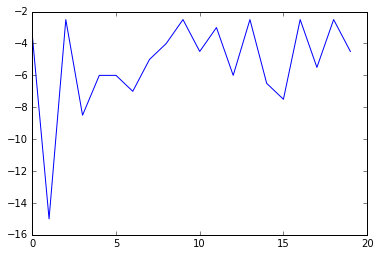

In [57]:
plt.plot(np.arange(len(s.episodes)), s.episodes)

In [54]:
s.episodes

array([ -3.5, -15. ,  -2.5,  -8.5,  -6. ,  -6. ,  -7. ,  -5. ,  -4. ,
        -2.5,  -4.5,  -3. ,  -6. ,  -2.5,  -6.5,  -7.5,  -2.5,  -5.5,
        -2.5,  -4.5])